In [3]:
pip install pandas jieba

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import jieba
from collections import Counter
import re

# 加载CSV文件
file_path = 'C:\\Users\\Administrator\\Desktop\\研究生一年级下\\文本数据分析\\santai.csv'
df = pd.read_csv(file_path)

# 数据清洗
# 去除网址、特殊字符等
df['clean_text'] = df['text'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", '', x, flags=re.MULTILINE))
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"[^\w\s]+|[\d]+", '', x).strip())

# 分词
# 使用jieba进行分词，并过滤掉单个字符的词
df['tokens'] = df['clean_text'].apply(lambda x: [word for word in jieba.lcut(x) if len(word) > 1])


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.589 seconds.
Prefix dict has been built successfully.


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import jieba
import re

# 定义分词函数
def jieba_tokenizer(text):
    return jieba.cut(text)

# 加载数据
file_path = 'C:\\Users\\Administrator\\Desktop\\研究生一年级下\\文本数据分析\\santai.csv'
df = pd.read_csv(file_path)

# 数据清洗
df['clean_text'] = df['text'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", '', x, flags=re.MULTILINE))
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"[^\w\s]+|[\d]+", '', x).strip())


# 初始化CountVectorizer
vectorizer = CountVectorizer(tokenizer=jieba_tokenizer, analyzer='word', stop_words=stop_words)
# 应用分词器和构建词袋模型
# CountVectorizer期望输入一个字符串列表，因此使用df['clean_text'].tolist()
X = vectorizer.fit_transform(df['clean_text'].tolist())

# 获取特征名（即词汇表中的单词）
feature_names = vectorizer.get_feature_names_out()

# 将X转换为数组，以便可以看到词频
word_array = X.toarray()

# 计算总词频
word_counts = word_array.sum(axis=0)

# 创建单词和其词频的映射
word_freq = dict(zip(feature_names, word_counts))

# 打印最常见的10个词及其频数
# 因为word_freq是一个字典，需要将其项转换为元组列表，然后排序
most_common_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
print(most_common_words)


D:\anacondatry\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[('的', 13233), ('了', 7664), ('三胎', 4974), ('是', 4648), ('我', 4465), ('在', 3042), ('c', 2948), ('展开', 2892), ('都', 2519), ('就', 2225)]


In [8]:
# 读取停用词文件
def load_stop_words(stop_words_path):
    with open(stop_words_path, 'r', encoding='utf-8') as f:
        stop_words = set([line.strip() for line in f.readlines()])
    return stop_words

stop_words_path = 'D:\\平常用不到\\大三下学期\\媒体信息数据挖掘\\上课素材\\jieba2022.04.01\\jieba2022.04.01\\stopwords.txt'
stop_words = load_stop_words(stop_words_path)


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import jieba
import re

# 定义分词函数，过滤掉停用词
def jieba_tokenizer(text):
    tokens = jieba.cut(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

# 加载数据
file_path = 'C:\\Users\\Administrator\\Desktop\\研究生一年级下\\文本数据分析\\santai.csv' 
df = pd.read_csv(file_path)

# 数据清洗
df['clean_text'] = df['text'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", '', x, flags=re.MULTILINE))
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"[^\w\s]+|[\d]+", '', x).strip())

# 初始化CountVectorizer，使用自定义分词函数
vectorizer = CountVectorizer(tokenizer=jieba_tokenizer, analyzer='word')

# 应用分词器和构建词袋模型
X = vectorizer.fit_transform(df['clean_text'].tolist())

# 获取特征名（即词汇表中的单词）和词频
feature_names = vectorizer.get_feature_names_out()
word_array = X.toarray()
word_counts = word_array.sum(axis=0)

# 创建单词和其词频的映射，然后打印最常见的30个词及其频数
word_freq = dict(zip(feature_names, word_counts))
most_common_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:30]
print(most_common_words)

D:\anacondatry\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[('三胎', 4974), ('c', 2948), ('展开', 2892), ('儿子', 1384), ('生', 1291), ('孩子', 1235), ('说', 1190), ('一个', 1173), ('老公', 718), ('没有', 711), ('月', 701), ('想', 676), ('二胎', 618), ('会', 601), ('带', 600), ('年', 599), ('没', 558), ('哈哈哈', 542), ('现在', 509), ('笑', 498), ('真的', 490), ('妈妈', 483), ('前', 477), ('已经', 475), ('五年', 472), ('做', 464), ('\u3000', 463), ('结婚', 449), ('三', 439), ('岁', 439)]


In [10]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [11]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

35860

In [12]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('三胎', 4974),
 ('c', 2948),
 ('展开', 2892),
 ('儿子', 1384),
 ('生', 1291),
 ('孩子', 1235),
 ('说', 1190),
 ('一个', 1173),
 ('老公', 718),
 ('没有', 711),
 ('月', 701),
 ('想', 676),
 ('二胎', 618),
 ('会', 601),
 ('带', 600),
 ('年', 599),
 ('没', 558),
 ('哈哈哈', 542),
 ('现在', 509),
 ('笑', 498),
 ('真的', 490),
 ('妈妈', 483),
 ('前', 477),
 ('已经', 475),
 ('五年', 472),
 ('做', 464),
 ('\u3000', 463),
 ('结婚', 449),
 ('三', 439),
 ('岁', 439),
 ('大佬', 428),
 ('奇才', 424),
 ('女人', 402),
 ('女儿', 381),
 ('两个', 376),
 ('中', 374),
 ('宝宝', 353),
 ('视频', 341),
 ('里', 327),
 ('微博', 319),
 ('知道', 316),
 ('\xa0', 310),
 ('今天', 310),
 ('一下', 305),
 ('刚', 304),
 ('二', 301),
 ('吃', 300),
 ('女性', 300),
 ('政策', 297),
 ('觉得', 295),
 ('回来', 286),
 ('家庭', 286),
 ('睡', 282),
 ('一家', 281),
 ('国家', 280),
 ('感觉', 279),
 ('老师', 276),
 ('怀', 274),
 ('死', 271),
 ('请', 267),
 ('生活', 266),
 ('蜘蛛侠', 266),
 ('日', 264),
 ('喜欢', 262),
 ('这种', 261),
 ('不能', 257),
 ('l', 250),
 ('女', 248),
 ('不要', 247),
 ('三个', 246),
 ('掉', 244),
 ('男', 243),
 ('中

In [13]:
# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='simhei.ttf',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=200,  # 设置最大显示的词数
    max_font_size=100  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

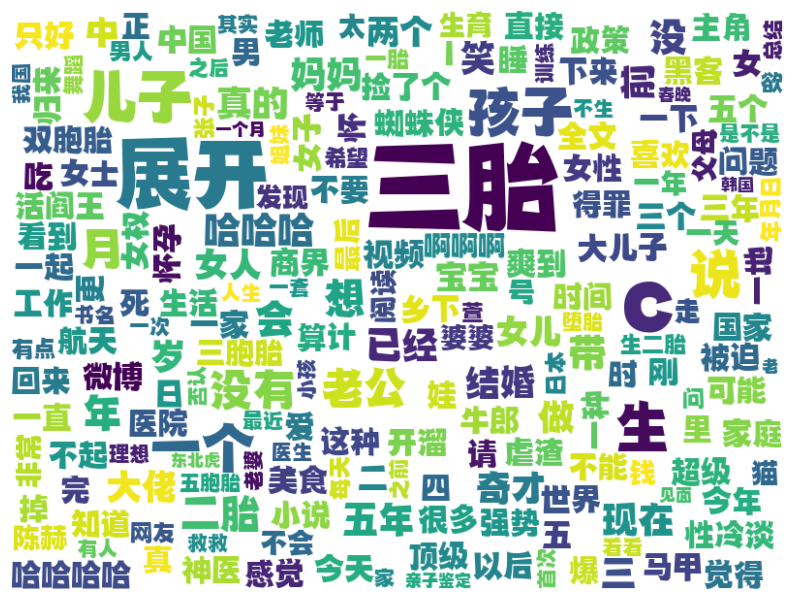

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 根据词频生成词云图
wordcloud = WordCloud(font_path='D:\\平常用不到\\大三下学期\\媒体信息数据挖掘\\楚辰体(个人免费商用)_@字体视界\\字体安装文件\\楚辰体_@字体视界.ttf',  # 字体路径，对于中文需要指定中文字体路径
                      background_color='white',  # 背景颜色
                      width=800, height=600,
                      max_font_size=100,  # 最大字体大小
                      min_font_size=10,   # 最小字体大小
                      ).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()